# Domestic Air Travel from 1990-2009

We begin our journey with importing our dataset and importing the needed libraries. Below, the most important libraries needed are:
- Pandas
- Networkx
- Matplotlib
- Geopandas
- Plotly

You will see as we move through the project how we use each one. To begin, pandas becomes our most important library as it helps to covert our dataset into dataframes and we can then manipulate all of our data needed. We import our dataset and take a look. 

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import streamlit as st
from datetime import datetime
from IPython.core.display import display, HTML
import geopandas as gpd
from plotly import graph_objects as go
import numpy as np

flights_df = pd.read_csv('/work/FinalProject/Airports2.csv')
flights_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701
3606801,CGI,TBN,"Cape Girardeau, MO","Fort Leonard Wood, MO",2,19,1,146,2009-08-01,93712,46457,37.225300,-89.570801,37.741600,-92.140701


As we can see, the import worked and all of our data is there to work with. Now for the boring part, the cleaning.

The following code cleans our data and gets all of our columns in the format that we want it to. We also add a few more columns to our dataset, including:
- Empty Seats
- Revenue Passenger Miles
- Missed Revenue Miles
- Average Seats Per Flights

Lastly, we filter our dataset to focus on between 2005-2009 since that will condense our dataset from 3 million rows to only about 14 thousand, which is much more manigable.

In [2]:
flights_df['Fly_date'] = pd.to_datetime(flights_df['Fly_date'], format = '%Y-%m')
flights_df['Fly_date'] = pd.to_datetime(flights_df['Fly_date']).dt.to_period('m')
flights_df['Fly_date'] = flights_df['Fly_date'].astype('str')
flights_df['Empty_Seats'] = flights_df['Seats'] - flights_df['Passengers']
flights_df['Available_Seat_Miles'] = flights_df['Seats'] * flights_df['Distance']
flights_df['Revenue_Passenger_Mile'] = flights_df['Passengers'] * flights_df['Distance']
flights_df['Missed_Revenue_Miles'] = flights_df['Available_Seat_Miles'] - flights_df['Revenue_Passenger_Mile']
flights_df['Avg_Seats_per_Flight'] = round(flights_df['Seats']/flights_df['Flights'],0)
flights_df = flights_df.loc[(flights_df['Fly_date'] > '2005-01-01')
                     & (flights_df['Fly_date'] < '2010-01-01')]

flights_df = flights_df.loc[(flights_df['Flights'] >= 200)]
flights_df

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Empty_Seats,Available_Seat_Miles,Revenue_Passenger_Mile,Missed_Revenue_Miles,Avg_Seats_per_Flight
14471,HNL,ITO,"Honolulu, HI","Hilo, HI",31021,35814,282,216,2005-06,900340,164887,21.318701,-157.921997,19.721399,-155.048004,4793,7735824,6700536,1035288,127.0
14478,HNL,ITO,"Honolulu, HI","Hilo, HI",24071,32639,257,216,2005-12,900340,164887,21.318701,-157.921997,19.721399,-155.048004,8568,7050024,5199336,1850688,127.0
14485,HNL,ITO,"Honolulu, HI","Hilo, HI",19819,28956,228,216,2005-11,900340,164887,21.318701,-157.921997,19.721399,-155.048004,9137,6254496,4280904,1973592,127.0
14494,HNL,ITO,"Honolulu, HI","Hilo, HI",30209,35687,281,216,2005-03,900340,164887,21.318701,-157.921997,19.721399,-155.048004,5478,7708392,6525144,1183248,127.0
14508,HNL,ITO,"Honolulu, HI","Hilo, HI",28433,36957,291,216,2005-08,900340,164887,21.318701,-157.921997,19.721399,-155.048004,8524,7982712,6141528,1841184,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604714,DFW,COS,"Dallas, TX","Colorado Springs, CO",23192,28696,211,592,2006-07,11998822,601150,32.896801,-97.038002,38.805801,-104.700996,5504,16988032,13729664,3258368,136.0
3604720,DFW,COS,"Dallas, TX","Colorado Springs, CO",19755,28832,212,592,2006-08,11998822,601150,32.896801,-97.038002,38.805801,-104.700996,9077,17068544,11694960,5373584,136.0
3604723,DFW,COS,"Dallas, TX","Colorado Springs, CO",16952,27326,201,592,2006-10,11998822,601150,32.896801,-97.038002,38.805801,-104.700996,10374,16176992,10035584,6141408,136.0
3604730,DFW,COS,"Dallas, TX","Colorado Springs, CO",18419,28287,208,592,2006-05,11998822,601150,32.896801,-97.038002,38.805801,-104.700996,9868,16745904,10904048,5841856,136.0


Now that the cleaning is all set and all of the data is in their correct types respectively, now we can move onto the analysis. 

The first analysis that we wanted to do was a map of all of the airports. This is where geopandas come in. With geopandas, you can read in maps of earth or other places based off of longitude and latitude to create a scatterplot of different coordinates. For this, we used a map of the United States and made it so it plots all of the coordiantes of the airports from our dataset. 

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  del sys.path[0]


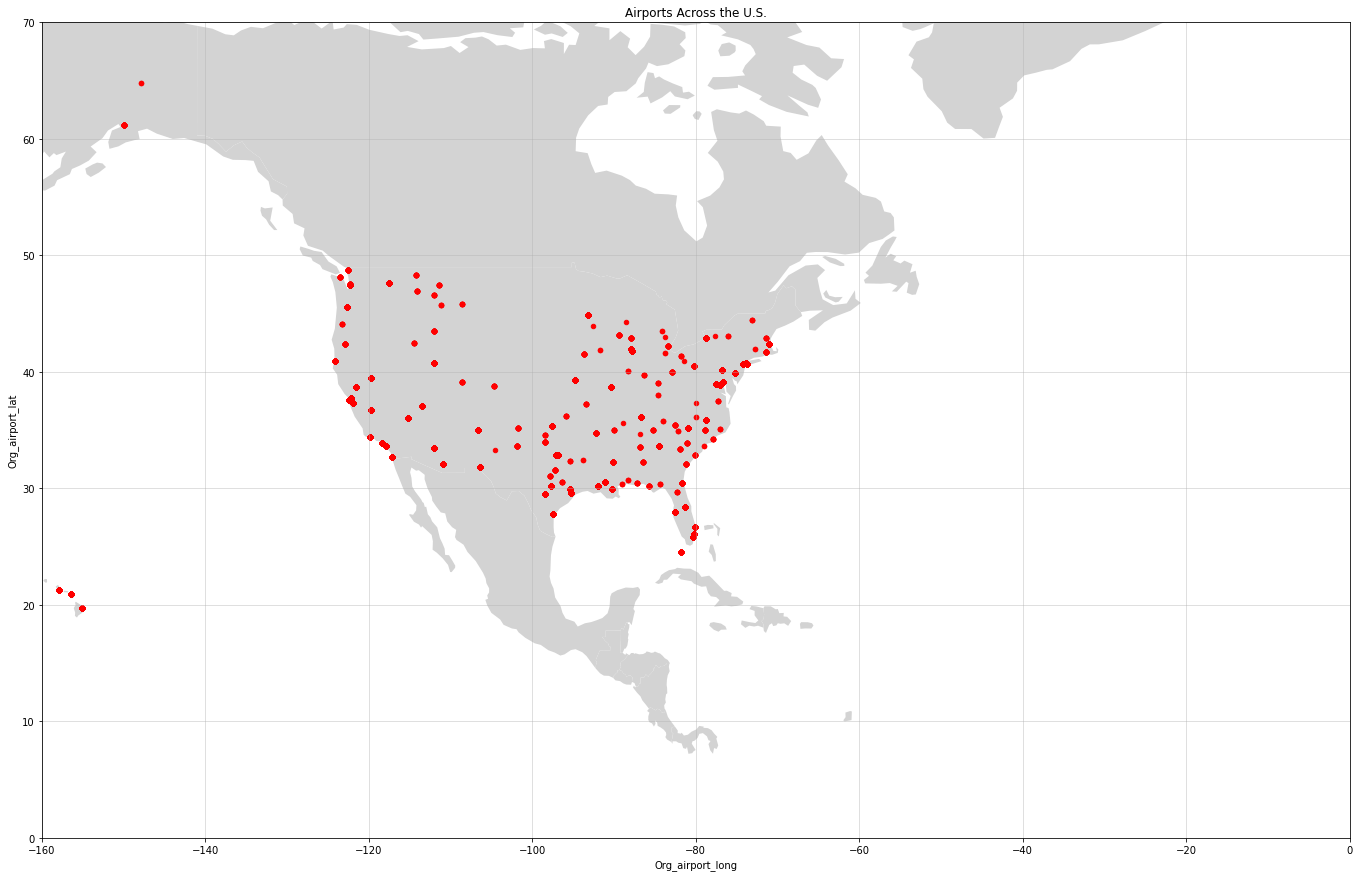

In [3]:
fig, ax = plt.subplots(figsize=(100,15))

continents = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

continents[continents['continent']=='North America'].plot(color='lightgrey',
ax=ax)

flights_df.plot(x = 'Org_airport_long', y = 'Org_airport_lat', kind = 'scatter', c = 'red',
                colormap = 'YlOrRd', title = 'Airports Across the U.S.', ax=ax)

ax.set(xlim=(-160,0), ylim=(0,70), autoscale_on = False)

ax.grid(b=True, alpha=0.5)

plt.show()

As you can see from our code, we plotted our coordinates on the map of North America to show all of the points possible (including Alaska and Hawaii). All of the red points represents an airport in the United States. All of these airports are connected somehow, and in the next part of the code, we can see how all of the airports are connected to one another. 

In the next part of the code, what we wanted to do was create an interconnected network of all of the airports. At first, we tried doing a normal network with networkx, but that did not work, however since it was a messy picture of just lines and circles. Instead, we wanted to draw the network on a map of the United States, and that is what we did below. 

In [4]:
fig = go.Figure()

source_to_dest = zip(flights_df['Org_airport_lat'], 
                    flights_df['Dest_airport_lat'], 
                    flights_df['Org_airport_long'], 
                    flights_df['Dest_airport_long'], 
                    flights_df['Flights'])

for slat, dlat, slon, dlon, num_flights in source_to_dest:
    fig.add_trace(go.Scattergeo(
        lat = [slat,dlat],
        lon = [slon, dlon],
        mode = 'lines',
        line = dict( width= num_flights/100, color = 'lime')
    ))
cities = flights_df['Origin_city'].values.tolist()+flights_df['Destination_city'].values.tolist()
airports = flights_df['Origin_airport'].values.tolist()+flights_df['Destination_airport'].values.tolist()
scatter_hover_data = [airport + ' : ' + city for city, airport in zip(cities, airports)]

fig.add_trace(
    go.Scattergeo(
        lon = flights_df['Org_airport_long'].values.tolist()+flights_df['Dest_airport_long'].values.tolist(),
        lat = flights_df['Org_airport_lat'].values.tolist()+flights_df['Dest_airport_lat'].values.tolist(),
        hoverinfo = 'text',
        text = scatter_hover_data,
        mode = 'markers',
        marker = dict(size=10, color='orangered', opacity=0.1))
    )

fig.update_layout(title_text = 'Connection Map Showing Flights between U.S. Cities',
                height=700, width=900,
                margin={'t':0, 'b':0, 'l':0, 'r':0, 'pad':0},
                showlegend=False,
                geo = dict(scope='usa'))
fig.show()

If you hover over any point on the map above, you can see what airport is being represented by each point. The deeper the color red, the more connected flights there are. ATL has the largest amount of connections which can be seen on the map.

Now we move onto the graphs. They might look messy, but the reason for that is we will be filtering by airport in our streamlit app which you can find in the bottom of the notebook. The first graph that we can is the number of flights per airport. We wanted to show this to help prove that the most amount of flights are coming out of a ATL and other major airports.

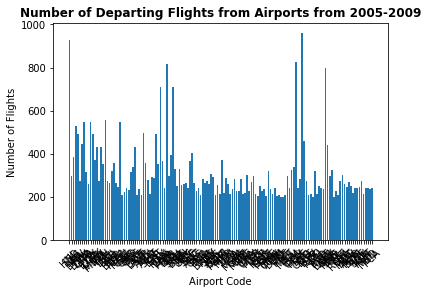

In [5]:
plt.bar(flights_df['Origin_airport'], flights_df['Flights'])
plt.xticks(rotation=45)
plt.xlabel('Airport Code')
plt.ylabel('Number of Flights')
plt.title('Number of Departing Flights from Airports from 2005-2009', fontweight='bold')
plt.show()

#streamlit filter by airport

Now that is a messy graph! However, everything will be filtered in our streamlit app when choosing airports! 

Our next graph we will show the Passenger Revenue Per Mile per Airport. Again, it will be filtered through the streamlit app.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



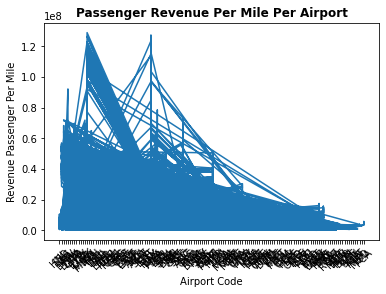

In [6]:
plt.bar(flights_df['Origin_airport'],flights_df['Revenue_Passenger_Mile'])
plt.xticks(rotation=45)
plt.xlabel('Airport Code')
plt.ylabel('Revenue Passenger Per Mile')
plt.title('Passenger Revenue Per Mile Per Airport', fontweight='bold')
ax.set_xticklabels(flights_df['Origin_airport'])
plt.show()

#streamlit filter by airport

Lastly, our final graph will show the total amount of passengers from each airport.

2022-04-28 12:53:18.797 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-28 12:53:18.804 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


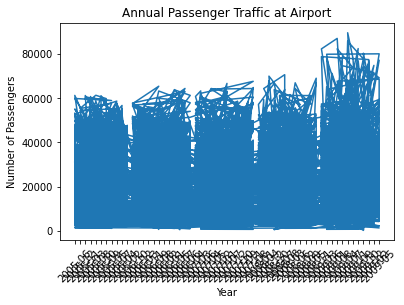

In [7]:
plt.bar(flights_df['Origin_airport'], flights_df['Passengers'])
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Annual Passenger Traffic at Airport')
plt.show()

#streamlit filter by airport

In [ ]:
Once again, it is a messy graph, but it will be filtered later on. It shows the annual Passenger traffic at each airport.

The next blocks of code helps with our filtering. What this does is it takes certain columns and groups them by the airport itself, then takes the sum and finds where each if located in the dataframe.

In [8]:
airport_flights = flights_df[['Origin_airport', 'Flights']]
grouped = airport_flights.groupby('Origin_airport').sum()
df = grouped.loc[grouped.index.isin(['ATL', "DFW"])]

airport_passengers = flights_df[['Origin_airport', 'Passengers']]
grouped_pass = airport_passengers.groupby('Origin_airport').sum()
df1 = grouped_pass.loc[grouped_pass.index.isin(['ATL', 'DFW'])]

airport_date_flights = flights_df[['Origin_airport', 'Revenue_Passenger_Mile']]
grouped_date_flights = airport_date_flights.groupby('Origin_airport').sum()
df2 = grouped_date_flights[grouped_date_flights.index.isin(['ATL', 'DFW'])]

,Passengers
Origin_airport,
ATL,19848059
DFW,38640717


There is no output, meaning that it works!

Last but not least, we can now run our streamlit app. We copied all of our code into a .py file and ran it through stremalit with filters. Let's take a look!

In [11]:
from IPython.display import HTML
import os

display( HTML( f'<h2><a href="http://{os.environ["DEEPNOTE_PROJECT_ID"]}.deepnoteproject.com" target="_blank">Click here to open your Streamlit app.</a></h2>' ) )

In [19]:
!cd .. && streamlit run /work/FinalProject/streamlit_app.py --server.port=8080 --server.address='0.0.0.0'


  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8080

^C
  Stopping...


In [14]:
%env PROJECT_FOLDER FinalProject

env: PROJECT_FOLDER=FinalProject


In [16]:
# This copies the latest version of all your files into the folder for syncing with GitHub:
!cp ../*.* "..//work/FinalProject/"

# This commits those changes and pushes them to GitHub:
!cd "../FinalProject/" && git add -A && git commit -m 'Changed Committed' && git push

cp: cannot stat '../*.*': No such file or directory
/bin/bash: line 0: cd: ../FinalProject/: No such file or directory


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51f11cc4-a3cf-4877-9390-0c91ec2f82b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>